# Tensor Flow Model Binary Classification

There is a difference in how to setup problems for Binary classification (0 or 1, A or B, Yes or No, etc) vs Multi-Category Classification (0/1/2, A/B/C, Yes/No/Maybe, etc)

### Getting Started


Dataset

Breast Cancer Dataset from SKLearn

`from sklearn.datasets import load_breast_cancer`

Classification Test Set (Titanic Data Set)

https://www.kaggle.com/datasets/brendan45774/test-file

Import the libraries

`
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
`



## Clean, Manipulate and Prepare the data

###### Train Test Split

For TensorFlow, values are more important than dataframes

`
X = df[df.columns[1:]].values
y = df['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
`

###### Scaling the data

`
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
` 

Check, the min for X_train should be 0.0 and the min for X_test should not be 0.0

`
X_train.min() -> 0.0
X_test.min() -> -0.014 (my dataset)
`

## Training the model


### Instantiation

`
model = Sequential()
`

### Layers

###### Binary Classification
`
model.add(Dense(12, activation='relu' ))
model.add(Dense(8, activation='relu' ))
model.add(Dense(1, activation='sigmoid' ))
`


### Compile

###### Binary Classification

0 or 1, True or False, Present or Not Present

`model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])`



### Fit

Fit the model with the training data

`epochs` (optional) -> number of times the model will run and try to improve upon itself

`validation_data` (optional) ->  Compare against the actual data to check against overfit/underfit, not used in calcualtion however added to `model.history.history` output


`model.fit(X_train, y_train, epochs=250, verbose=2, validation_data=(X_test, y_test))`



### Pre-Prediciton Metrics

###### Overfitting

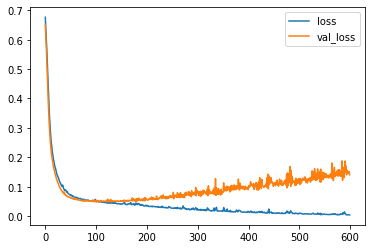

###### Early Stopping

`monitor` -> either `accuracy` or `val_loss`

`mode` -> `min` for `val_loss`, `max` for `accuracy` or `auto` if you want to let the algorithm decide

`patience` -> How many epochs to wait before making a decision to stop

Define Early Stopping

`early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
model = Sequential()`

Re-create the entire model

`
model = Sequential()
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy')
model.fit(X_train, y_train, epochs=600, validation_data=(X_test, y_test), callbacks=[early_stopping])
`

Output

`Epoch 138: early stopping`


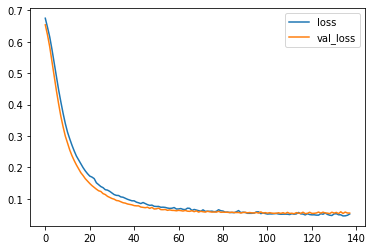

###### Droput
Dropout helps prevent overfitting by turning off nodes at random in neural network

Essentially it's a way to slow the calculations down

`Droput(rate)` -> between 0 and 1, value at which we randomly turn off neurons during each batch

`
model = Sequential()
model.add(Dense(30, activation='relu'))
model.add(Dropout(0.2)) # Randomly drops 20% of the 30 nodes in the layer above
model.add(Dense(15, activation='relu'))
model.add(Dropout(0.2)) # Randomly drops 20% of the 15 nodes in the layer above
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy')
model.fit(X_train, y_train, epochs=600, validation_data=(X_test, y_test), callbacks=[early_stopping])
`

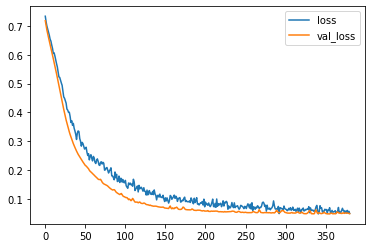

## Predictions

Predictions for classification are a little different than sklearn

SKLearn does something nice in the classification predictions and that it automaically converts the end values for us to interpret

TensorFlow, not so nice

We didn't see this in the regression problem because we actually wanted numbers but here we want 0's and 1's

So we have to do a little conversion

`predictions = (model.predict(X_test) > 0.5) * 1`


## Evaluations

We can evaluate the training data and the test data

`
model.evaluate(X_test, y_test, verbose=1)
model.evaluate(X_train, y_train, verbose=1)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
`




In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler

### Cancer Data Classification

In [2]:
data = load_breast_cancer()

In [3]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
df = pd.DataFrame(data.data, columns=data.feature_names)

In [5]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
df['target'] = data.target

In [7]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [8]:
df.shape

(569, 31)

/Users/roadblock/coding/coding101/data_sciences/venv_data_sciences/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

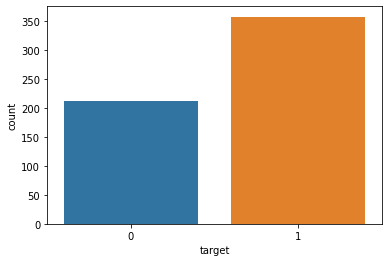

In [9]:
sns.countplot(df['target'])

In [10]:
# Train test split and we are going to scale our data as well

X = df[df.columns[:-1]].values
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


In [11]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
X_train.min()

0.0

In [13]:
X_test.min()

-0.09792843691148767

In [14]:
# Model Creation and setup

model = Sequential()


# Create our hidden layers
model.add(Dense(31, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))

# Output layer for Binary Classification has a different activation algorithm
# Binary classification activation algoritm uses 'sigmoid'
# regression can use 'relu'
# Multi-class will use softmax
model.add(Dense(1, activation='sigmoid'))

# Setup the compile method for the model

# Binary classification the loss parameter is binary_crossentropy
model.compile(optimizer='adam', loss='binary_crossentropy')

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500)



2022-06-15 11:37:53.559093: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/500
13/13 [==============================] - 3s 61ms/step - loss: 0.6823 - val_loss: 0.6649
Epoch 2/500
13/13 [==============================] - 0s 14ms/step - loss: 0.6526 - val_loss: 0.6305
Epoch 3/500
13/13 [==============================] - 0s 15ms/step - loss: 0.6194 - val_loss: 0.5941
Epoch 4/500
13/13 [==============================] - 0s 15ms/step - loss: 0.5842 - val_loss: 0.5545
Epoch 5/500
13/13 [==============================] - 0s 15ms/step - loss: 0.5456 - val_loss: 0.5129
Epoch 6/500
13/13 [==============================] - 0s 15ms/step - loss: 0.5034 - val_loss: 0.4654
Epoch 7/500
13/13 [==============================] - 0s 15ms/step - loss: 0.4579 - val_loss: 0.4164
Epoch 8/500
13/13 [==============================] - 0s 15ms/step - loss: 0.4134 - val_loss: 0.3684
Epoch 9/500
13/13 [==============================] - 0s 21ms/step - loss: 0.3679 - val_loss: 0.3227
Epoch 10/500
13/13 [==============================] - 0s 22ms/step - loss: 0.3276 - val_loss: 0.2825

13/13 [==============================] - 0s 13ms/step - loss: 0.0365 - val_loss: 0.0442
Epoch 83/500
13/13 [==============================] - 0s 15ms/step - loss: 0.0362 - val_loss: 0.0562
Epoch 84/500
13/13 [==============================] - 0s 18ms/step - loss: 0.0389 - val_loss: 0.0457
Epoch 85/500
13/13 [==============================] - 0s 16ms/step - loss: 0.0357 - val_loss: 0.0508
Epoch 86/500
13/13 [==============================] - 0s 14ms/step - loss: 0.0389 - val_loss: 0.0431
Epoch 87/500
13/13 [==============================] - 0s 14ms/step - loss: 0.0377 - val_loss: 0.0434
Epoch 88/500
13/13 [==============================] - 0s 15ms/step - loss: 0.0351 - val_loss: 0.0436
Epoch 89/500
13/13 [==============================] - 0s 15ms/step - loss: 0.0356 - val_loss: 0.0451
Epoch 90/500
13/13 [==============================] - 0s 14ms/step - loss: 0.0338 - val_loss: 0.0493
Epoch 91/500
13/13 [==============================] - 0s 13ms/step - loss: 0.0339 - val_loss: 0.0433
Epo

13/13 [==============================] - 0s 16ms/step - loss: 0.0171 - val_loss: 0.0676
Epoch 163/500
13/13 [==============================] - 0s 20ms/step - loss: 0.0188 - val_loss: 0.0545
Epoch 164/500
13/13 [==============================] - 0s 16ms/step - loss: 0.0177 - val_loss: 0.0522
Epoch 165/500
13/13 [==============================] - 0s 17ms/step - loss: 0.0235 - val_loss: 0.0800
Epoch 166/500
13/13 [==============================] - 0s 20ms/step - loss: 0.0219 - val_loss: 0.0527
Epoch 167/500
13/13 [==============================] - 0s 18ms/step - loss: 0.0180 - val_loss: 0.0616
Epoch 168/500
13/13 [==============================] - 0s 18ms/step - loss: 0.0169 - val_loss: 0.0625
Epoch 169/500
13/13 [==============================] - 0s 16ms/step - loss: 0.0154 - val_loss: 0.0574
Epoch 170/500
13/13 [==============================] - 0s 16ms/step - loss: 0.0154 - val_loss: 0.0583
Epoch 171/500
13/13 [==============================] - 0s 16ms/step - loss: 0.0147 - val_loss: 0

13/13 [==============================] - 0s 14ms/step - loss: 0.0073 - val_loss: 0.0816
Epoch 243/500
13/13 [==============================] - 0s 15ms/step - loss: 0.0093 - val_loss: 0.0831
Epoch 244/500
13/13 [==============================] - 0s 14ms/step - loss: 0.0101 - val_loss: 0.1153
Epoch 245/500
13/13 [==============================] - 0s 15ms/step - loss: 0.0114 - val_loss: 0.0773
Epoch 246/500
13/13 [==============================] - 0s 15ms/step - loss: 0.0064 - val_loss: 0.1036
Epoch 247/500
13/13 [==============================] - 0s 13ms/step - loss: 0.0079 - val_loss: 0.0759
Epoch 248/500
13/13 [==============================] - 0s 13ms/step - loss: 0.0078 - val_loss: 0.1412
Epoch 249/500
13/13 [==============================] - 0s 16ms/step - loss: 0.0184 - val_loss: 0.0784
Epoch 250/500
13/13 [==============================] - 0s 15ms/step - loss: 0.0113 - val_loss: 0.0766
Epoch 251/500
13/13 [==============================] - 0s 15ms/step - loss: 0.0085 - val_loss: 0

13/13 [==============================] - 0s 14ms/step - loss: 0.0059 - val_loss: 0.1052
Epoch 323/500
13/13 [==============================] - 0s 14ms/step - loss: 0.0038 - val_loss: 0.1371
Epoch 324/500
13/13 [==============================] - 0s 14ms/step - loss: 0.0029 - val_loss: 0.1173
Epoch 325/500
13/13 [==============================] - 0s 15ms/step - loss: 0.0036 - val_loss: 0.1188
Epoch 326/500
13/13 [==============================] - 0s 14ms/step - loss: 0.0045 - val_loss: 0.1433
Epoch 327/500
13/13 [==============================] - 0s 14ms/step - loss: 0.0029 - val_loss: 0.1181
Epoch 328/500
13/13 [==============================] - 0s 13ms/step - loss: 0.0038 - val_loss: 0.1350
Epoch 329/500
13/13 [==============================] - 0s 14ms/step - loss: 0.0029 - val_loss: 0.1170
Epoch 330/500
13/13 [==============================] - 0s 14ms/step - loss: 0.0034 - val_loss: 0.1227
Epoch 331/500
13/13 [==============================] - 0s 14ms/step - loss: 0.0033 - val_loss: 0

13/13 [==============================] - 0s 14ms/step - loss: 0.0018 - val_loss: 0.1178
Epoch 403/500
13/13 [==============================] - 0s 14ms/step - loss: 0.0018 - val_loss: 0.1148
Epoch 404/500
13/13 [==============================] - 0s 14ms/step - loss: 0.0017 - val_loss: 0.1147
Epoch 405/500
13/13 [==============================] - 0s 13ms/step - loss: 0.0019 - val_loss: 0.1180
Epoch 406/500
13/13 [==============================] - 0s 13ms/step - loss: 0.0020 - val_loss: 0.1172
Epoch 407/500
13/13 [==============================] - 0s 13ms/step - loss: 0.0022 - val_loss: 0.1170
Epoch 408/500
13/13 [==============================] - 0s 13ms/step - loss: 0.0018 - val_loss: 0.1174
Epoch 409/500
13/13 [==============================] - 0s 13ms/step - loss: 0.0016 - val_loss: 0.1246
Epoch 410/500
13/13 [==============================] - 0s 13ms/step - loss: 0.0023 - val_loss: 0.1161
Epoch 411/500
13/13 [==============================] - 0s 14ms/step - loss: 0.0021 - val_loss: 0

13/13 [==============================] - 0s 15ms/step - loss: 9.1076e-04 - val_loss: 0.1392
Epoch 483/500
13/13 [==============================] - 0s 14ms/step - loss: 0.0011 - val_loss: 0.1394
Epoch 484/500
13/13 [==============================] - 0s 12ms/step - loss: 0.0010 - val_loss: 0.1402
Epoch 485/500
13/13 [==============================] - 0s 13ms/step - loss: 8.9988e-04 - val_loss: 0.1407
Epoch 486/500
13/13 [==============================] - 0s 13ms/step - loss: 9.6287e-04 - val_loss: 0.1395
Epoch 487/500
13/13 [==============================] - 0s 14ms/step - loss: 9.9692e-04 - val_loss: 0.1384
Epoch 488/500
13/13 [==============================] - 0s 14ms/step - loss: 8.3168e-04 - val_loss: 0.1468
Epoch 489/500
13/13 [==============================] - 0s 13ms/step - loss: 9.7633e-04 - val_loss: 0.1444
Epoch 490/500
13/13 [==============================] - 0s 13ms/step - loss: 0.0010 - val_loss: 0.1363
Epoch 491/500
13/13 [==============================] - 0s 14ms/step - lo

<AxesSubplot:>

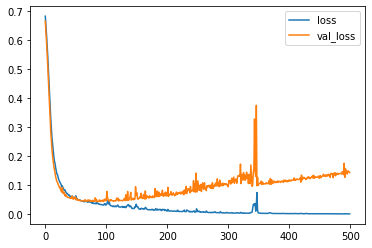

In [15]:
# Map our losses

# This is a sign of overfitting our data...how can we improve or stop earlier?

losses = pd.DataFrame(model.history.history)
losses.plot()

In [16]:
# We want to stop our model around the 50-70 mark automaticall
model = Sequential()


# Create our hidden layers
model.add(Dense(31, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))

# Output layer for Binary Classification has a different activation algorithm
# Binary classification activation algoritm uses 'sigmoid'
# regression can use 'relu'
# Multi-class will use softmax
model.add(Dense(1, activation='sigmoid'))

# Setup the compile method for the model

# Binary classification the loss parameter is binary_crossentropy
model.compile(optimizer='adam', loss='binary_crossentropy')


early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=20)


# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, callbacks=[early_stopping])



Epoch 1/500
13/13 [==============================] - 3s 57ms/step - loss: 0.6560 - val_loss: 0.6344
Epoch 2/500
13/13 [==============================] - 0s 15ms/step - loss: 0.6183 - val_loss: 0.5930
Epoch 3/500
13/13 [==============================] - 0s 20ms/step - loss: 0.5750 - val_loss: 0.5436
Epoch 4/500
13/13 [==============================] - 0s 16ms/step - loss: 0.5285 - val_loss: 0.4912
Epoch 5/500
13/13 [==============================] - 0s 15ms/step - loss: 0.4754 - val_loss: 0.4313
Epoch 6/500
13/13 [==============================] - 0s 15ms/step - loss: 0.4198 - val_loss: 0.3745
Epoch 7/500
13/13 [==============================] - 0s 15ms/step - loss: 0.3697 - val_loss: 0.3276
Epoch 8/500
13/13 [==============================] - 0s 15ms/step - loss: 0.3301 - val_loss: 0.2885
Epoch 9/500
13/13 [==============================] - 0s 15ms/step - loss: 0.2954 - val_loss: 0.2568
Epoch 10/500
13/13 [==============================] - 0s 16ms/step - loss: 0.2658 - val_loss: 0.2333

13/13 [==============================] - 0s 15ms/step - loss: 0.0539 - val_loss: 0.0553
Epoch 83/500
13/13 [==============================] - 0s 13ms/step - loss: 0.0521 - val_loss: 0.0640
Epoch 84/500
13/13 [==============================] - 0s 13ms/step - loss: 0.0437 - val_loss: 0.0535
Epoch 85/500
13/13 [==============================] - 0s 15ms/step - loss: 0.0425 - val_loss: 0.0580
Epoch 86/500
13/13 [==============================] - 0s 16ms/step - loss: 0.0442 - val_loss: 0.0530
Epoch 87/500
13/13 [==============================] - 0s 18ms/step - loss: 0.0447 - val_loss: 0.0599
Epoch 88/500
13/13 [==============================] - 0s 14ms/step - loss: 0.0441 - val_loss: 0.0525
Epoch 89/500
13/13 [==============================] - 0s 16ms/step - loss: 0.0409 - val_loss: 0.0565
Epoch 90/500
13/13 [==============================] - 0s 19ms/step - loss: 0.0407 - val_loss: 0.0531
Epoch 91/500
13/13 [==============================] - 0s 14ms/step - loss: 0.0424 - val_loss: 0.0616
Epo

<AxesSubplot:>

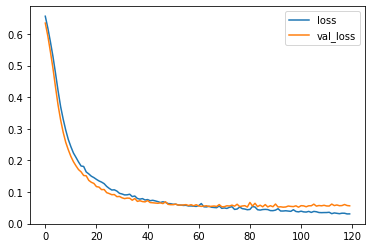

In [17]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [18]:
# We have one more optinal technique at our disposal and that is Dropout

# Dropout eliminates a percentage of neurons per hidden layer which slows down the actual model and can allow for better accuracy

model = Sequential()


# Create our hidden layers
model.add(Dense(31, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))

# Output layer for Binary Classification has a different activation algorithm
# Binary classification activation algoritm uses 'sigmoid'
# regression can use 'relu'
# Multi-class will use softmax
model.add(Dense(1, activation='sigmoid'))

# Setup the compile method for the model

# Binary classification the loss parameter is binary_crossentropy
model.compile(optimizer='adam', loss='binary_crossentropy')


early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=20)


# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, callbacks=[early_stopping])



Epoch 1/500
13/13 [==============================] - 3s 51ms/step - loss: 0.6902 - val_loss: 0.6549
Epoch 2/500
13/13 [==============================] - 0s 14ms/step - loss: 0.6649 - val_loss: 0.6247
Epoch 3/500
13/13 [==============================] - 0s 14ms/step - loss: 0.6406 - val_loss: 0.5998
Epoch 4/500
13/13 [==============================] - 0s 14ms/step - loss: 0.6191 - val_loss: 0.5748
Epoch 5/500
13/13 [==============================] - 0s 14ms/step - loss: 0.5862 - val_loss: 0.5421
Epoch 6/500
13/13 [==============================] - 0s 16ms/step - loss: 0.5610 - val_loss: 0.5078
Epoch 7/500
13/13 [==============================] - 0s 16ms/step - loss: 0.5447 - val_loss: 0.4760
Epoch 8/500
13/13 [==============================] - 0s 15ms/step - loss: 0.5059 - val_loss: 0.4500
Epoch 9/500
13/13 [==============================] - 0s 15ms/step - loss: 0.4715 - val_loss: 0.4261
Epoch 10/500
13/13 [==============================] - 0s 16ms/step - loss: 0.4583 - val_loss: 0.4075

13/13 [==============================] - 0s 15ms/step - loss: 0.1230 - val_loss: 0.0558
Epoch 83/500
13/13 [==============================] - 0s 15ms/step - loss: 0.0942 - val_loss: 0.0565
Epoch 84/500
13/13 [==============================] - 0s 14ms/step - loss: 0.0934 - val_loss: 0.0522
Epoch 85/500
13/13 [==============================] - 0s 14ms/step - loss: 0.0880 - val_loss: 0.0511
Epoch 86/500
13/13 [==============================] - 0s 14ms/step - loss: 0.1099 - val_loss: 0.0512
Epoch 87/500
13/13 [==============================] - 0s 14ms/step - loss: 0.0980 - val_loss: 0.0530
Epoch 88/500
13/13 [==============================] - 0s 14ms/step - loss: 0.0821 - val_loss: 0.0519
Epoch 89/500
13/13 [==============================] - 0s 14ms/step - loss: 0.1077 - val_loss: 0.0509
Epoch 90/500
13/13 [==============================] - 0s 15ms/step - loss: 0.0955 - val_loss: 0.0563
Epoch 91/500
13/13 [==============================] - 0s 15ms/step - loss: 0.0990 - val_loss: 0.0506
Epo

<AxesSubplot:>

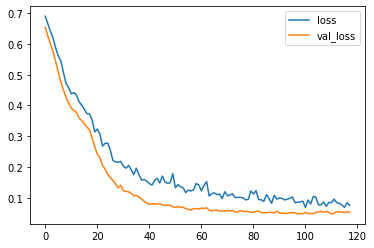

In [19]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [20]:
# Now we can look at our predictions
# Predictions will be weird looking because of the sigmoid calculation


predictions = (model.predict(X_test) > 0.5) * 1

predictions


6/6 [==============================] - 0s 4ms/step


array([[1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
    

In [21]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[ 61   2]
 [  1 107]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98        63
           1       0.98      0.99      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



### TItanic Dataset Classification

In [218]:
df = pd.read_csv('Titanic.csv')

In [219]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [220]:

def fill_in_age(col):
    age = col[0]
    pclass = col[1]
    if np.isnan(age):
        if pclass == 1:
            return 41
        elif pclass == 2:
            return 29
        else:
            return 24
    else:
        return age
    

df['Age'] = df[['Age', 'Pclass']].apply(fill_in_age, axis=1)

# Split Embarked and PClass (get_dummies)

emb = pd.get_dummies(df['Embarked'], drop_first=True)
pclass = pd.get_dummies(df['Pclass'], drop_first=True).rename({2:'P2',3:'P3'}, axis=1)



# Concat embarked and Pclass
df = pd.concat([df, emb, pclass], axis=1)



# Drop all the unnecessary columns
df = df.drop(['PassengerId', 'Name', 'Sex', 'Pclass', 'Embarked', 'Cabin', 'Ticket'], axis=1)

# drop the NA values or fill them in (Fare Colums)
df['Fare'].loc[152] = 12.46

df.head()

/var/folders/l_/qm4dplj969j0tcpycqgttbwc0000gn/T/ipykernel_27618/797057983.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fare'].loc[152] = 12.46


,Survived,Age,SibSp,Parch,Fare,Q,S,P2,P3
0,0,34.5,0,0,7.8292,1,0,0,1
1,1,47.0,1,0,7.0000,0,1,0,1
2,0,62.0,0,0,9.6875,1,0,1,0
3,0,27.0,0,0,8.6625,0,1,0,1
4,1,22.0,1,1,12.2875,0,1,0,1


In [221]:
X = df[df.columns[1:]]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [222]:
# Scale the data

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [223]:
# Let's Build the model

model = Sequential()


# Add the hidden layers

model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='relu'))

# Output Layer
model.add(Dense(1, activation='sigmoid'))


# Compile attributes
model.compile(optimizer='adam', loss='binary_crossentropy')

# Fit
model.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test))







Epoch 1/500
10/10 [==============================] - 1s 16ms/step - loss: 0.7019 - val_loss: 0.7038
Epoch 2/500
10/10 [==============================] - 0s 5ms/step - loss: 0.6952 - val_loss: 0.6980
Epoch 3/500
10/10 [==============================] - 0s 4ms/step - loss: 0.6915 - val_loss: 0.6926
Epoch 4/500
10/10 [==============================] - 0s 4ms/step - loss: 0.6891 - val_loss: 0.6905
Epoch 5/500
10/10 [==============================] - 0s 4ms/step - loss: 0.6880 - val_loss: 0.6894
Epoch 6/500
10/10 [==============================] - 0s 4ms/step - loss: 0.6873 - val_loss: 0.6884
Epoch 7/500
10/10 [==============================] - 0s 4ms/step - loss: 0.6865 - val_loss: 0.6874
Epoch 8/500
10/10 [==============================] - 0s 4ms/step - loss: 0.6857 - val_loss: 0.6866
Epoch 9/500
10/10 [==============================] - 0s 4ms/step - loss: 0.6849 - val_loss: 0.6855
Epoch 10/500
10/10 [==============================] - 0s 4ms/step - loss: 0.6841 - val_loss: 0.6841
Epoch 11

10/10 [==============================] - 0s 4ms/step - loss: 0.6395 - val_loss: 0.6499
Epoch 84/500
10/10 [==============================] - 0s 4ms/step - loss: 0.6391 - val_loss: 0.6505
Epoch 85/500
10/10 [==============================] - 0s 4ms/step - loss: 0.6389 - val_loss: 0.6509
Epoch 86/500
10/10 [==============================] - 0s 4ms/step - loss: 0.6386 - val_loss: 0.6510
Epoch 87/500
10/10 [==============================] - 0s 4ms/step - loss: 0.6380 - val_loss: 0.6501
Epoch 88/500
10/10 [==============================] - 0s 4ms/step - loss: 0.6375 - val_loss: 0.6492
Epoch 89/500
10/10 [==============================] - 0s 4ms/step - loss: 0.6371 - val_loss: 0.6489
Epoch 90/500
10/10 [==============================] - 0s 4ms/step - loss: 0.6366 - val_loss: 0.6489
Epoch 91/500
10/10 [==============================] - 0s 4ms/step - loss: 0.6363 - val_loss: 0.6495
Epoch 92/500
10/10 [==============================] - 0s 4ms/step - loss: 0.6359 - val_loss: 0.6492
Epoch 93/500


10/10 [==============================] - 0s 4ms/step - loss: 0.6065 - val_loss: 0.6350
Epoch 246/500
10/10 [==============================] - 0s 4ms/step - loss: 0.6066 - val_loss: 0.6353
Epoch 247/500
10/10 [==============================] - 0s 4ms/step - loss: 0.6063 - val_loss: 0.6350
Epoch 248/500
10/10 [==============================] - 0s 4ms/step - loss: 0.6062 - val_loss: 0.6352
Epoch 249/500
10/10 [==============================] - 0s 4ms/step - loss: 0.6067 - val_loss: 0.6361
Epoch 250/500
10/10 [==============================] - 0s 4ms/step - loss: 0.6061 - val_loss: 0.6358
Epoch 251/500
10/10 [==============================] - 0s 4ms/step - loss: 0.6065 - val_loss: 0.6361
Epoch 252/500
10/10 [==============================] - 0s 5ms/step - loss: 0.6063 - val_loss: 0.6349
Epoch 253/500
10/10 [==============================] - 0s 4ms/step - loss: 0.6060 - val_loss: 0.6345
Epoch 254/500
10/10 [==============================] - 0s 4ms/step - loss: 0.6060 - val_loss: 0.6342
Epoc

10/10 [==============================] - 0s 5ms/step - loss: 0.5955 - val_loss: 0.6412
Epoch 408/500
10/10 [==============================] - 0s 5ms/step - loss: 0.5963 - val_loss: 0.6409
Epoch 409/500
10/10 [==============================] - 0s 4ms/step - loss: 0.5961 - val_loss: 0.6398
Epoch 410/500
10/10 [==============================] - 0s 4ms/step - loss: 0.5953 - val_loss: 0.6403
Epoch 411/500
10/10 [==============================] - 0s 4ms/step - loss: 0.5954 - val_loss: 0.6403
Epoch 412/500
10/10 [==============================] - 0s 4ms/step - loss: 0.5956 - val_loss: 0.6403
Epoch 413/500
10/10 [==============================] - 0s 4ms/step - loss: 0.5949 - val_loss: 0.6407
Epoch 414/500
10/10 [==============================] - 0s 5ms/step - loss: 0.5949 - val_loss: 0.6413
Epoch 415/500
10/10 [==============================] - 0s 4ms/step - loss: 0.5950 - val_loss: 0.6416
Epoch 416/500
10/10 [==============================] - 0s 4ms/step - loss: 0.5955 - val_loss: 0.6417
Epoc

<AxesSubplot:>

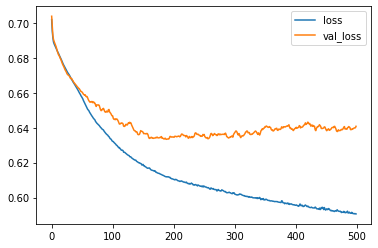

In [224]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [227]:
model = Sequential()


# Add the hidden layers

model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='relu'))

# Output Layer
model.add(Dense(1, activation='sigmoid'))


# Compile attributes
model.compile(optimizer='adam', loss='binary_crossentropy')


early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=20)

# Fit
model.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test), callbacks=[early_stopping])



Epoch 1/500
10/10 [==============================] - 1s 16ms/step - loss: 0.6862 - val_loss: 0.6850
Epoch 2/500
10/10 [==============================] - 0s 5ms/step - loss: 0.6785 - val_loss: 0.6771
Epoch 3/500
10/10 [==============================] - 0s 4ms/step - loss: 0.6730 - val_loss: 0.6715
Epoch 4/500
10/10 [==============================] - 0s 4ms/step - loss: 0.6697 - val_loss: 0.6672
Epoch 5/500
10/10 [==============================] - 0s 4ms/step - loss: 0.6664 - val_loss: 0.6640
Epoch 6/500
10/10 [==============================] - 0s 4ms/step - loss: 0.6640 - val_loss: 0.6612
Epoch 7/500
10/10 [==============================] - 0s 6ms/step - loss: 0.6619 - val_loss: 0.6592
Epoch 8/500
10/10 [==============================] - 0s 5ms/step - loss: 0.6604 - val_loss: 0.6573
Epoch 9/500
10/10 [==============================] - 0s 5ms/step - loss: 0.6586 - val_loss: 0.6542
Epoch 10/500
10/10 [==============================] - 0s 4ms/step - loss: 0.6564 - val_loss: 0.6521
Epoch 11

10/10 [==============================] - 0s 4ms/step - loss: 0.6153 - val_loss: 0.6280
Epoch 84/500
10/10 [==============================] - 0s 4ms/step - loss: 0.6143 - val_loss: 0.6288
Epoch 85/500
10/10 [==============================] - 0s 4ms/step - loss: 0.6136 - val_loss: 0.6284
Epoch 86/500
10/10 [==============================] - 0s 4ms/step - loss: 0.6133 - val_loss: 0.6282
Epoch 87/500
10/10 [==============================] - 0s 4ms/step - loss: 0.6133 - val_loss: 0.6282
Epoch 88/500
10/10 [==============================] - 0s 4ms/step - loss: 0.6129 - val_loss: 0.6293
Epoch 89/500
10/10 [==============================] - 0s 4ms/step - loss: 0.6125 - val_loss: 0.6294
Epoch 90/500
10/10 [==============================] - 0s 4ms/step - loss: 0.6122 - val_loss: 0.6297
Epoch 91/500
10/10 [==============================] - 0s 5ms/step - loss: 0.6120 - val_loss: 0.6292
Epoch 92/500
10/10 [==============================] - 0s 4ms/step - loss: 0.6118 - val_loss: 0.6281
Epoch 93/500


<AxesSubplot:>

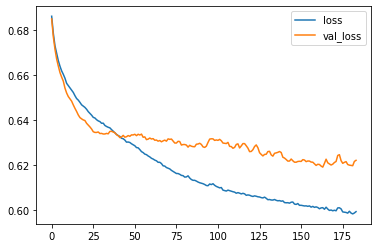

In [228]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [229]:
model = Sequential()


# Add the hidden layers

model.add(Dense(10, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation='relu'))
model.add(Dropout(0.2))

# Output Layer
model.add(Dense(1, activation='sigmoid'))


# Compile attributes
model.compile(optimizer='adam', loss='binary_crossentropy')


early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=20)

# Fit
model.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test), callbacks=[early_stopping])



Epoch 1/500
10/10 [==============================] - 1s 16ms/step - loss: 0.6909 - val_loss: 0.6863
Epoch 2/500
10/10 [==============================] - 0s 4ms/step - loss: 0.6901 - val_loss: 0.6839
Epoch 3/500
10/10 [==============================] - 0s 4ms/step - loss: 0.6875 - val_loss: 0.6819
Epoch 4/500
10/10 [==============================] - 0s 5ms/step - loss: 0.6825 - val_loss: 0.6794
Epoch 5/500
10/10 [==============================] - 0s 4ms/step - loss: 0.6810 - val_loss: 0.6771
Epoch 6/500
10/10 [==============================] - 0s 4ms/step - loss: 0.6822 - val_loss: 0.6751
Epoch 7/500
10/10 [==============================] - 0s 5ms/step - loss: 0.6797 - val_loss: 0.6725
Epoch 8/500
10/10 [==============================] - 0s 4ms/step - loss: 0.6821 - val_loss: 0.6698
Epoch 9/500
10/10 [==============================] - 0s 4ms/step - loss: 0.6809 - val_loss: 0.6681
Epoch 10/500
10/10 [==============================] - 0s 6ms/step - loss: 0.6787 - val_loss: 0.6660
Epoch 11

Epoch 83/500
10/10 [==============================] - 0s 4ms/step - loss: 0.6399 - val_loss: 0.6325
Epoch 84/500
10/10 [==============================] - 0s 4ms/step - loss: 0.6473 - val_loss: 0.6325
Epoch 85/500
10/10 [==============================] - 0s 4ms/step - loss: 0.6400 - val_loss: 0.6329
Epoch 86/500
10/10 [==============================] - 0s 4ms/step - loss: 0.6459 - val_loss: 0.6324
Epoch 87/500
10/10 [==============================] - 0s 4ms/step - loss: 0.6359 - val_loss: 0.6328
Epoch 88/500
10/10 [==============================] - 0s 4ms/step - loss: 0.6401 - val_loss: 0.6338
Epoch 89/500
10/10 [==============================] - 0s 4ms/step - loss: 0.6408 - val_loss: 0.6332
Epoch 90/500
10/10 [==============================] - 0s 4ms/step - loss: 0.6287 - val_loss: 0.6320
Epoch 91/500
10/10 [==============================] - 0s 5ms/step - loss: 0.6322 - val_loss: 0.6319
Epoch 92/500
10/10 [==============================] - 0s 4ms/step - loss: 0.6276 - val_loss: 0.6329


<AxesSubplot:>

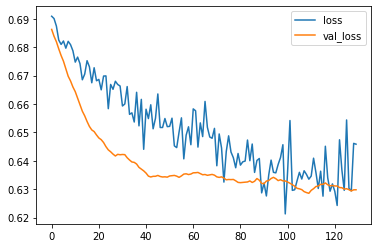

In [230]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [232]:
predictions = (model.predict(X_test) > 0.5) * 1
predictions

4/4 [==============================] - 0s 1ms/step


array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
    

In [233]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[83  2]
 [39  2]]
              precision    recall  f1-score   support

           0       0.68      0.98      0.80        85
           1       0.50      0.05      0.09        41

    accuracy                           0.67       126
   macro avg       0.59      0.51      0.45       126
weighted avg       0.62      0.67      0.57       126

